# Exercise 2 - Advanced Statistics for Physics Analysis (A.Y. 2022-2023)
by Erica Brisigotti (2097202)

In [1]:
library(tidyverse)
library(pracma)
library(geometry)
SAVE = FALSE

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘pracma’


The following object is masked from ‘package:purrr’:

    cross



Attaching package: ‘geometry’


The following objects are masked from ‘package:pracma’:

    cart2pol, cart2sph, dot, pol2cart, polyarea, sph2cart




## Exercise 1 - Discrete random variable
the probability distribution function of a discrete variable k is given by the following:
$$ p(k) = \begin{cases} \begin{matrix} \frac{k}{15} & k = 1, 2, 3, 4, 5 \\ 0  &  \text{otherwise}  \end{matrix}  \end{cases}$$

1. write the R probability functions for the probability density and cumulative distribution functions,
following the R naming convention

In [2]:
my_discrete_d <- function(k){ t <- ifelse(k %in% c(1,2,3,4,5), k/15, 0)
                    return(t) }
my_discrete_p <- function(vect){ t <- numeric()
                        for (i in 1:length(vect)){ k <- vect[i]
                                                 t[i] <- sum(my_discrete_d(1:k)) }
                        return(t) }

 2. produce two plots showing the pdf and cdf, separately


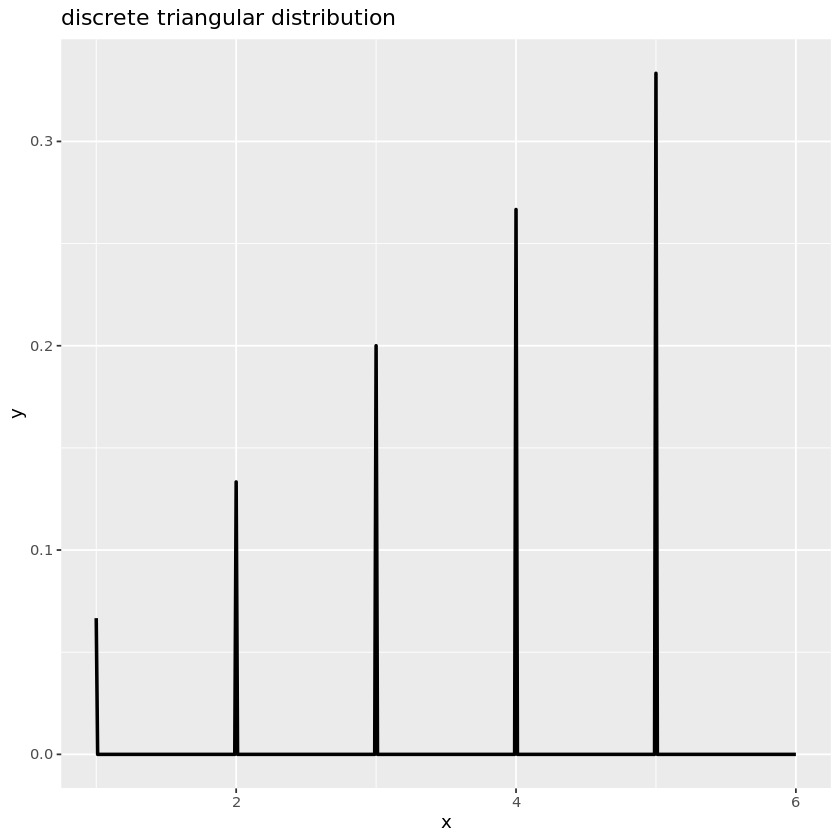

In [3]:
rg_plot = data.frame( x=seq(1, 6, 0.01), 
                      y=my_discrete_d(seq(1, 6, 0.01)) )
g1 <- ggplot(rg_plot) +
        geom_line( aes(x=x,y=y), color='black', linewidth=1) + labs(x="x") + ggtitle("discrete triangular distribution")
print(g1)
if (SAVE) { ggsave("E2_output/01_discrete1.pdf", g1, width = 29, height = 20, units = "cm", dpi=500) }

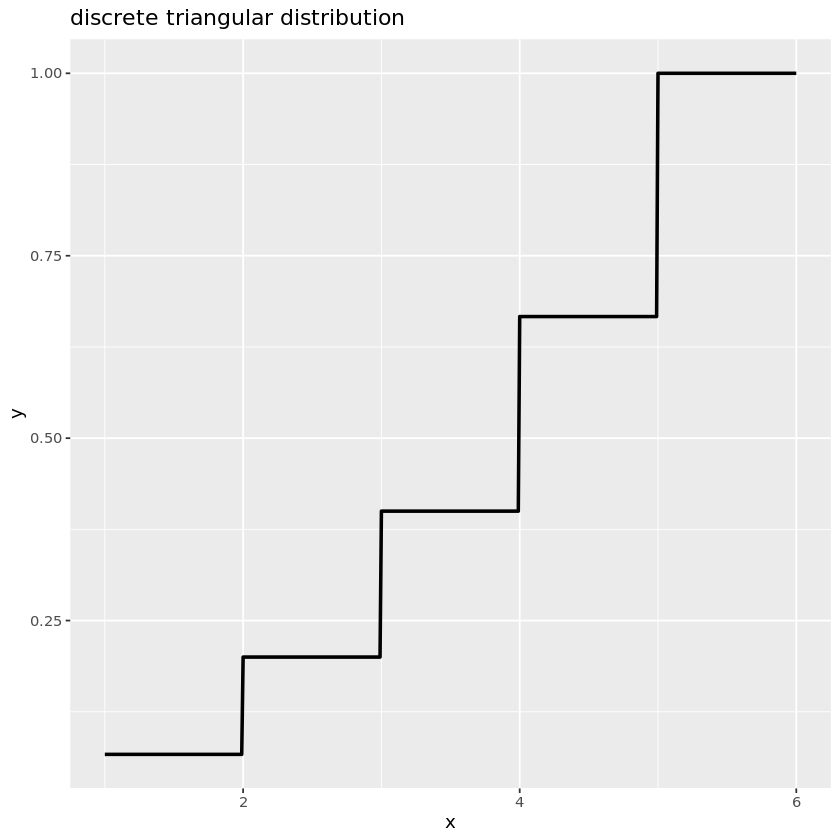

In [4]:
rg_plot = data.frame( x=seq(1, 6, 0.01), 
                      y=my_discrete_p(seq(1, 6, 0.01)) )
g2 <- ggplot(rg_plot) +
        geom_line( aes(x=x,y=y), color='black', linewidth=1) + labs(x="x") + ggtitle("discrete triangular distribution")
print(g2)
if (SAVE) { ggsave("E2_output/02_discrete2.pdf", g2, width = 29, height = 20, units = "cm", dpi=500) }

3. compute, using R, the mean value and variance of the probability distribution

In [5]:
my_av <- function(k_set){ return (dot( k_set , my_discrete_d(k_set) )) }
my_var <- function(k_set){ x_av = my_av(k_set)
                           x_squared_av = dot( (k_set)^2 , my_discrete_d(k_set) )
                           return( sqrt( x_squared_av - x_av^2 ) ) }
k0_set = 1:5
av0 = my_av(k0_set)
var0 = my_var(k0_set)
fprintf('the average of the probability distribution is %.2f . \n', av0) 
fprintf('the variance of the probability distribution is %.2f .', var0)

the average of the probability distribution is 3.67 . 
the variance of the probability distribution is 1.25 .

4. compute, using R, the expected value $E [k (6 − k)]$


In [6]:
my_transformation <- function(vect){ k1 <- numeric()
                                     for (i in 1:length(vect)){ k <- vect[i]
                                                                k1[i] <- k*(6-k) }
                                     return(k1) }
k1_set = my_transformation(k0_set)
av1 = my_av(k1_set)
var1 = my_var(k1_set)
fprintf('the average of the probability distribution is %.2f . \n', av1) 
fprintf('the variance of the probability distribution is %.2f .', var1)

the average of the probability distribution is 3.33 . 
the variance of the probability distribution is 2.36 .

5. write the R function that allows to sample random numbers from the probability distribution

In [7]:
my_discrete_r <- function(n, k_set){ k <- numeric()
                                     for (i in 1:n){ val <- runif(1)
                                                     c <- my_discrete_p(k_set)
                                                     k[i] <- ifelse( any((c <= val)==TRUE), 
                                                             (tail(which(c <= val),1)+1), 1. ) }
                  return(k) }

6. Using the implemented function (point (5)), sample 105, random numbers from this distribution and
plot them in a graph showing the distribution of the numbers superimposed to the pdf (normalize
properly the plots with random numbers

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


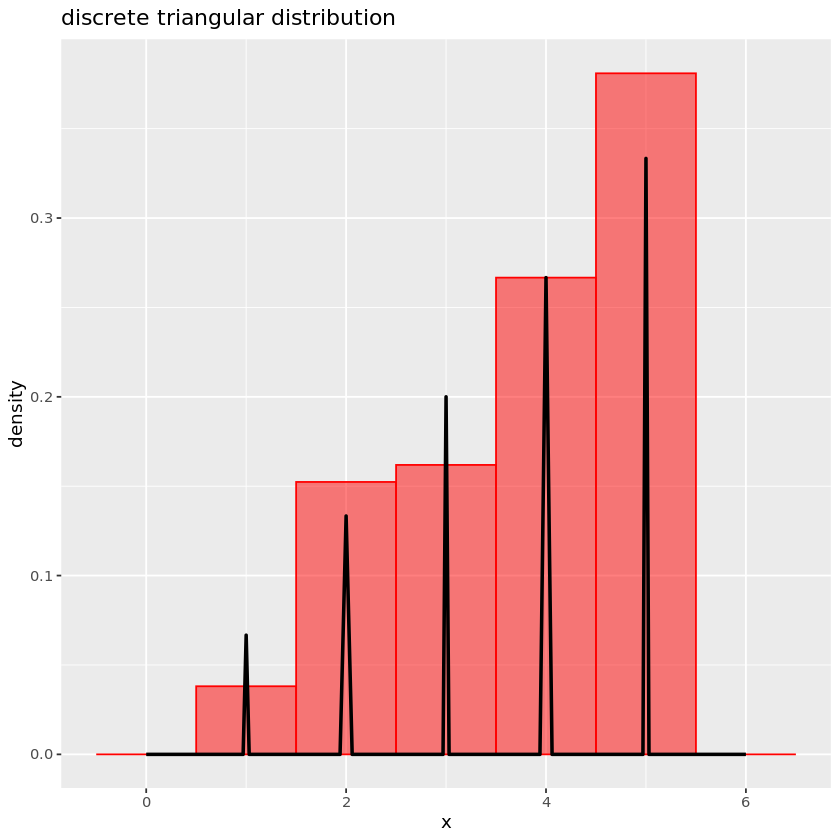

In [8]:
rg_plot = data.frame( x_rg=my_discrete_r(105, k0_set), x=c(1:5,seq(0, 6, length.out=100)), 
                     y=my_discrete_d( c(1:5,seq(0, 6, length.out=100)) ))
g3 <- ggplot(rg_plot) + 
        geom_histogram( aes(x=x_rg,y=..density..), binwidth=1, alpha=0.5, color='red', fill='red') +
        geom_line( aes(x=x,y=y), color='black', linewidth=1) + labs(x="x") + ggtitle("discrete triangular distribution")
print(g3)
if (SAVE) { ggsave("E2_output/03_discrete3.pdf", g3, width = 29, height = 20, units = "cm", dpi=500) }

## Exercise 2 - Continuous random variable
The triangular distribution, in the interval (a, b), is given by the following:
$$ f(x) \begin{cases} \begin{matrix} 
    \frac{2(x-a)}{(b-a)(c-a)} & a \leq x < c  \\ 
    \frac{2(b-x)}{(b-a)(b-c)} & c \leq x \leq b  \\ 
    0  &  \text{otherwise} 
    \end{matrix} \end{cases} $$
where $c \in [a,b]$

In [9]:
a = 3
c = 5.5
b = 12

 1. plot the function, given the interval (a, b)

In [10]:
my_continuous_d = function(vect,a,b,c){ 
    t = numeric()
    for (i in 1:length(vect)){ x <- vect[i]
                               if (x>=a && x<c){ t[i] <- 2*(x-a)/((b-a)*(c-a)) }
                               else if (x>=c && x<b){ t[i] <- 2*(b-x)/((b-a)*(b-c)) }
                               else { t[i] <- 0 }}                    
                   return(t)}
# I check that it's correctly normalized
temp <- integrate(function(y){my_continuous_d(y,a,b,c)}, lower = -Inf, upper = +Inf)
fprintf('the probability density function integral is %.2f',temp$value)

the probability density function integral is 1.00

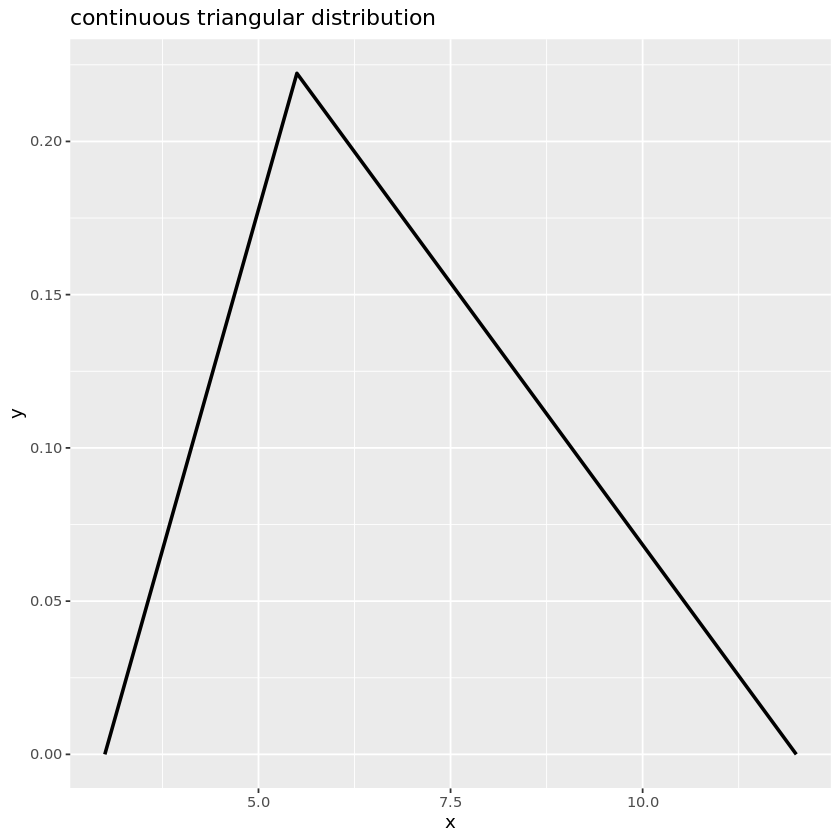

In [11]:
rg_plot = data.frame(x=seq(a, b, 0.01), 
                     y=my_continuous_d(seq(a, b, 0.01),a,b,c) )
g4 <- ggplot(rg_plot) +
        geom_line( aes(x=x,y=y), color='black', linewidth=1) + labs(x="x") + ggtitle("continuous triangular distribution")
print(g4)
if (SAVE) { ggsave("E2_output/04_continuous1.pdf", g4, width = 29, height = 20, units = "cm", dpi=500) }

2. and write an algorithm to generate random numbers from the triangular distribution

In [12]:
my_continuous_p <- function(vect,a,b,c){ 
    t <- numeric()
    for (i in 1:length(vect)){ y <- vect[i]
                              temp  <- integrate(function(x){my_continuous_d(x,a,b,c)},
                                                 lower = a, upper = y)
                              t[i] <- temp$value }
                   return(t) }

my_continuous_r <- function(n,a,b,c){
    x <- numeric()
    x_int <- seq(a,b,0.01) 
    c <- my_continuous_p(x_int,a,b,c)
    val <- runif(n)
    for (i in 1:n){ diff <- abs(c-val[i])
                    idx <- which( diff == min(diff) )[1] 
                    x[i] <- x_int[idx] }
                    return(x) }

3. generate $10^4$ random number from the distribution, show them in an histogram and superimpose the analytical curve

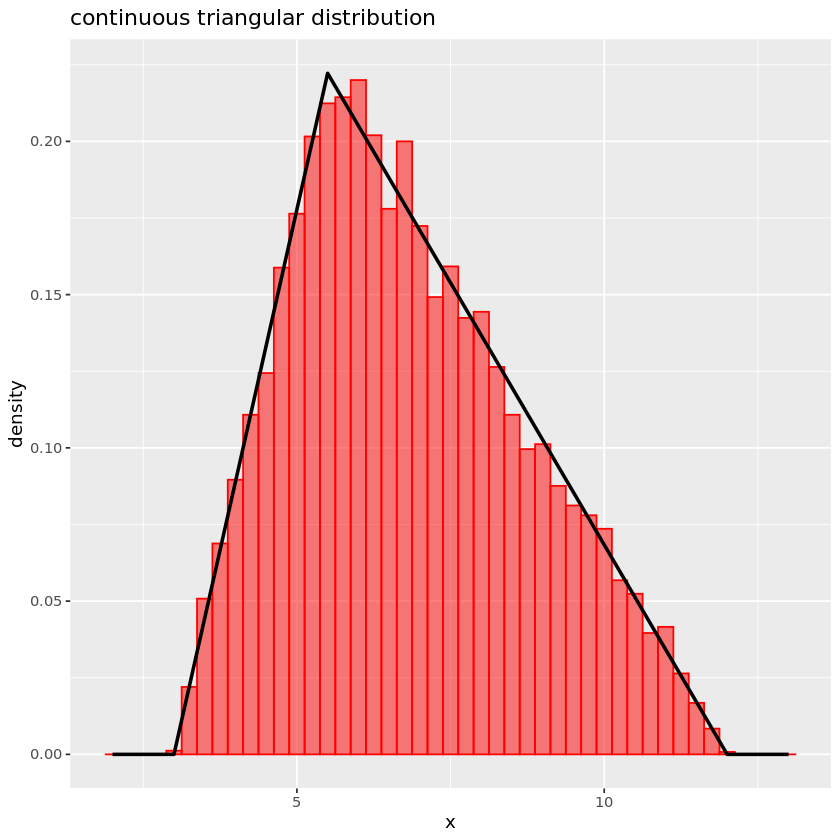

In [13]:
rg_plot = data.frame( x_rg=my_continuous_r(10^4,a,b,c), x=seq((a-1), (b+1), length.out=10^4), 
                     y=my_continuous_d( seq((a-1), (b+1), length.out=10^4) ,a,b,c) )
g5 <- ggplot(rg_plot) + 
        geom_histogram( aes(x=x_rg,y=..density..), binwidth=0.25, alpha=0.5, color='red', fill='red') +
        geom_line( aes(x=x,y=y), color='black', linewidth=1) + labs(x="x") + ggtitle("continuous triangular distribution")
print(g5)
if (SAVE) { ggsave("E2_output/05_continuous2.pdf", g5, width = 29, height = 20, units = "cm", dpi=500) }

## Exercise 3 
The waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an
exponential pdf with rate 1/30


In [14]:
rate = 1/30

1. simulate the waiting time for 60 people at the doctor’s office and plot the relative histogra

In [15]:
simulated = rexp(n=60, rate)

2. what is the probability that a person will wait for less than 12 minutes 

In [16]:
fprintf( 'the probability of waiting less than 12 minutes is %.2f percent.', pexp(12, rate)*100 )

the probability of waiting less than 12 minutes is 32.97 percent.

3. evaluate the average waiting time from the simulated data and compare it with the expected value (calculated from theory and by manipulating the probability distributions using R)

In [17]:
expected_av = integrate( function(x){x*dexp(x,rate)}, lower=-Inf, upper=+Inf )
fprintf( 'the expected average waiting time is %.2f', expected_av$value )

the expected average waiting time is 30.00

In [18]:
simulated_av = mean(simulated)
fprintf( 'the simulated average waiting time is %.2f', simulated_av )

the simulated average waiting time is 25.88

4. what is the probability for waiting more than one hour before being received ?

In [19]:
fprintf( 'the probability of waiting less more than 1 hour is %.2f percent.', (1-pexp(60, rate))*100 )

the probability of waiting less more than 1 hour is 13.53 percent.

## Exercise 4 - Multiple choices exam
The final exam of a course is given to the students in the format of a multiple choice written test:
for each questions there are five possible alternatives. 

A student either knows the answer, or selects randomly the answer among the five possible choices

1. Assuming the probability $p = 0.7$ that the student knows the answer, once a correct answer is given, what it the probability that the student really knew the correct answer ? 

 <span style="color:blue"> Once a correct answer is given, the probability that the student really knew the correct answer is given by </span>
 
 <span style="color:blue">
 $$ p(K|R) = \frac{p(k \cap R)}{p(R)} = \frac{p(K) \cdot p(R|K)}{p(K) \cdot p(R|K) + p(\bar{k}) \cdot p(R|\bar{K})}  $$
</span>
 
 <span style="color:blue"> where </span>
-  <span style="color:blue"> $p(K) = 0.7$ is the probability of knowing the right answer  </span>
-  <span style="color:blue"> $p(\bar{K})=1-p(K) = 0.3$ is the probability of guessing  </span>
-  <span style="color:blue"> $p(R|K)=1$ is the probability of giving the right answer while knowing which is the right answer  </span>
-  <span style="color:blue"> $p(R|\bar{K}) = \tfrac{1}{5} = 0.2 $ is the probability of catching the right answer while not knowing which is the right answer  </span>

2. Write a small R program to provide the answer.

In [20]:
p_k = 0.7
p_k_not = 1 - p_k
p_r_given_k = 1
p_r_given_k_not = 1/5
p_k_given_r = ( p_k * p_r_given_k ) / ( p_k * p_r_given_k + p_k_not * p_r_given_k_not )

fprintf("the probability of the student actually knowing the anwer, given a correct answer, is %.2f percent.",p_k_given_r*100)

the probability of the student actually knowing the anwer, given a correct answer, is 92.11 percent.

## Exercise 5 - Waiting time
Starting from 5:00 in the morning, every half an hour there is a train from Milano Centrale to Roma
Termini. We assume there is always an available seat on a train leaving from Milano. Assuming a person arrives at a random time between 10:45 and 11:45, compute the probability that she has to wait

1. at most 10 minutes

In [21]:
fprintf( 'the probability of waiting at most 10 minutes minutes is %.2f percent.', punif(10, min=0, max=30)*100 )

the probability of waiting at most 10 minutes minutes is 33.33 percent.

2. at least 15 minutes

In [22]:
fprintf( 'the probability of waiting at least 15 minutes minutes is %.2f percent.', (1-punif(15, min=0, max=30))*100 )

the probability of waiting at least 15 minutes minutes is 50.00 percent.

3. What is the average time spent waiting ?

In [23]:
expected_av = integrate( function(x){x*dunif(x, min=0, max=30)}, lower=0, upper=60 )
fprintf( 'the expected average waiting time is %.2f', expected_av$value )

the expected average waiting time is 15.00

## Exercise 6 - stock investment
The annual return rate for a specific stock on the market is a normal variable with a 10% mean and a 12% standard deviation.
Mr X decides to buy 200 share of that specific stock at a price of 85€ per share. Suppose there are no transaction costs and that there are no annual dividend for the stock. What is the probability that after a year his net profit from the investment is at least 800€? 

In [24]:
price_per_stock = 85
tot_stock = 200
tot_price = tot_stock * price_per_stock
av_per_stock = 10/100
std_per_stock = 12/100
profit_per_stock = 800 / tot_price

In [26]:
fprintf( 'the probability of making a %.2f percent profit on the specific stock is %.2f percent.', profit_per_stock*100,
        (1-pnorm(profit_per_stock, av_per_stock, std_per_stock))*100 )

the probability of making a 4.71 percent profit on the specific stock is 67.05 percent.